In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.zeros((6,6))
a

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
a[:, 1] = a[:, 1] + 10
a

array([[ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.]])

In [ ]:
a[:, 0] = a[:, 0] + 10
a

array([[10., 10.,  0.,  0.,  0.,  0.],
       [10., 10.,  0.,  0.,  0.,  0.],
       [10., 10.,  0.,  0.,  0.,  0.],
       [10., 10.,  0.,  0.,  0.,  0.],
       [10., 10.,  0.,  0.,  0.,  0.],
       [10., 10.,  0.,  0.,  0.,  0.]])

In [ ]:
a[:, 2] = a[:, 2] + 10
a

array([[10., 10., 10.,  0.,  0.,  0.],
       [10., 10., 10.,  0.,  0.,  0.],
       [10., 10., 10.,  0.,  0.,  0.],
       [10., 10., 10.,  0.,  0.,  0.],
       [10., 10., 10.,  0.,  0.,  0.],
       [10., 10., 10.,  0.,  0.,  0.]])

In [ ]:
b = np.array([1, 0, -1, 1, 0, -1, 1, 0, -1]).reshape((3,3))

In [ ]:
b

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

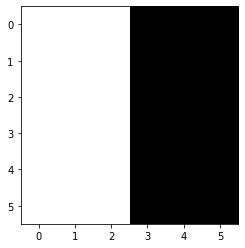

In [ ]:
plt.imshow(a, cmap='gray')

In [47]:
def convolution2d(image, kernel, bias=0):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

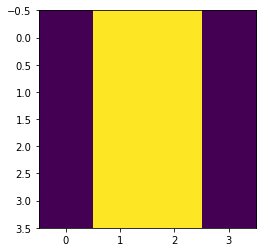

In [ ]:
plt.imshow(convolution2d(a, b))

In [ ]:
d = b.T
d

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

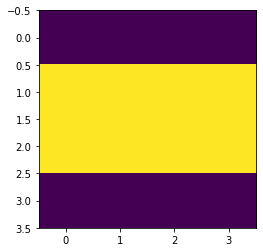

In [ ]:
plt.imshow(convolution2d(a.T, d))

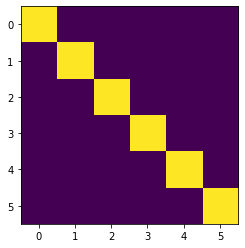

In [ ]:
e = np.eye(6) * 10
plt.imshow(e)

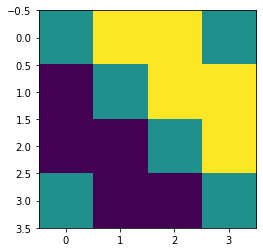

In [ ]:
plt.imshow(convolution2d(e, b))

In [ ]:
import matplotlib.image as mpimg

In [ ]:
curie = plt.imread('demo/marie.png')

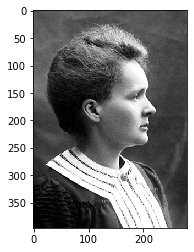

In [ ]:
plt.imshow(curie)

In [ ]:
curie.shape

(396, 280, 3)

In [ ]:
plt.imshow(convolution2d(curie, b))

ValueError: too many values to unpack (expected 2)

In [48]:
from PIL import Image

In [ ]:
curie = Image.open('demo/marie.png').convert('L')

In [ ]:
curie = np.array(curie)

In [ ]:
curie.shape

(396, 280)

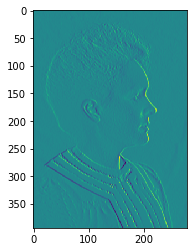

In [ ]:
plt.imshow(convolution2d(curie, b))

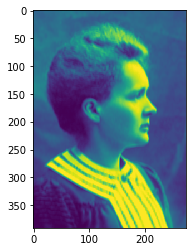

In [ ]:
plt.imshow(convolution2d(curie, a))

In [ ]:
f = np.eye((3, 3))
f

TypeError: 'tuple' object cannot be interpreted as an integer

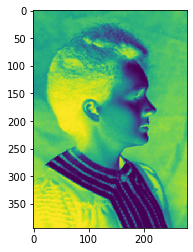

In [ ]:
plt.imshow(convolution2d(curie, np.eye(3)-1))

In [53]:
a = np.array([10,10,10,0,0,0])
b = np.array([0,0,0,10,10,10])
print(a, b)

[10 10 10  0  0  0] [ 0  0  0 10 10 10]


In [54]:
c = np.vstack((a, a, a, b, b, b))

In [55]:
c, c.shape

(array([[10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [10, 10, 10,  0,  0,  0],
        [ 0,  0,  0, 10, 10, 10],
        [ 0,  0,  0, 10, 10, 10],
        [ 0,  0,  0, 10, 10, 10]]), (6, 6))

In [9]:
filter_h = np.array([1,1,1,0,0,0,-1,-1,-1]).reshape((3,3))
filter_h

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

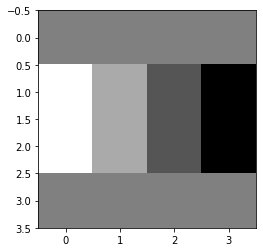

In [12]:
plt.imshow(convolution2d(c, filter_h), cmap='gray')

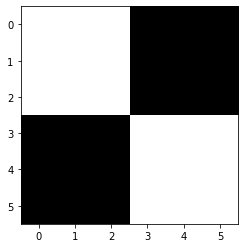

In [13]:
plt.imshow(c, cmap='gray')

In [49]:
filter_sobel = np.array([1,0,-1,2,0,-2,1,0,-1]).reshape((3,3))
filter_sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

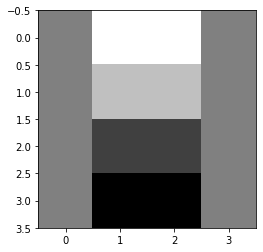

In [16]:
plt.imshow(convolution2d(c, filter_sobel), cmap='gray')

In [50]:
filter_scharr = np.array([3,0,-3,10,0,-10,3,0,-3]).reshape((3,3))
filter_scharr

array([[  3,   0,  -3],
       [ 10,   0, -10],
       [  3,   0,  -3]])

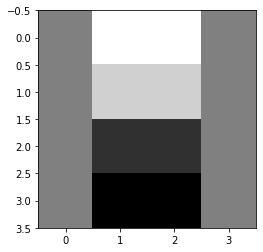

In [19]:
plt.imshow(convolution2d(c, filter_scharr), cmap='gray')

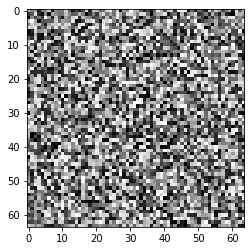

In [51]:
image = np.random.randint(low=0, high=256, size=(64,64))
plt.imshow(image, cmap='gray')

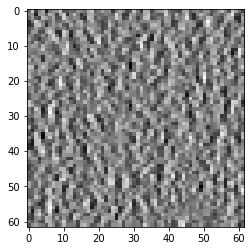

In [24]:
plt.imshow(convolution2d(image, filter_scharr), cmap='gray')

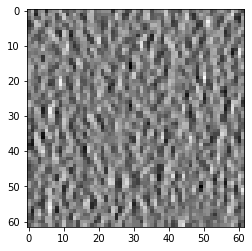

In [25]:
plt.imshow(convolution2d(image, filter_sobel), cmap='gray')

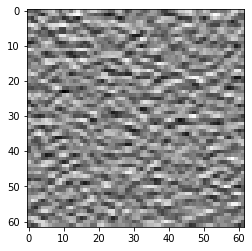

In [26]:
plt.imshow(convolution2d(image, filter_sobel.T), cmap='gray')

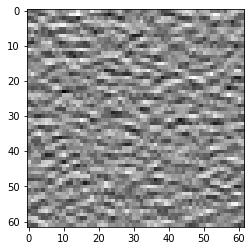

In [27]:
plt.imshow(convolution2d(image, filter_h), cmap='gray')

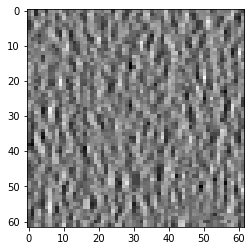

In [28]:
plt.imshow(convolution2d(image, filter_h.T), cmap='gray')

In [29]:
from PIL import Image

In [30]:
passport = Image.open('passport photo.JPG').convert('L')

In [31]:
passport = np.array(passport)

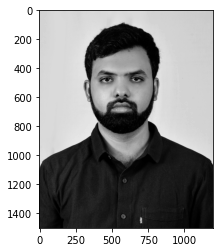

In [33]:
plt.imshow(passport, cmap='gray')

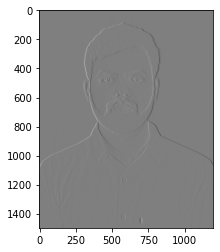

In [37]:
plt.imshow(convolution2d(passport, filter_scharr), cmap='gray');

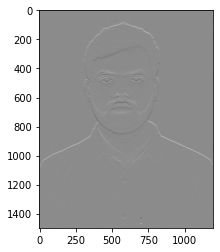

In [35]:
plt.imshow(convolution2d(passport, filter_scharr.T), cmap='gray')

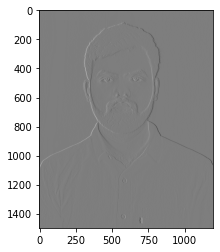

In [38]:
plt.imshow(convolution2d(passport, filter_sobel), cmap='gray')

In [57]:
def pooling(mat,ksize=(2,2),method='max',pad=False):
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling, 
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(np.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=np.full(size,np.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=np.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

    return result

In [58]:
pooling(c)

array([[10, 10,  0],
       [10, 10, 10],
       [ 0, 10, 10]])

In [61]:
pooling(filter_scharr, pad=True, method='mean')

array([[ 3.25, -6.5 ],
       [ 1.5 , -3.  ]])

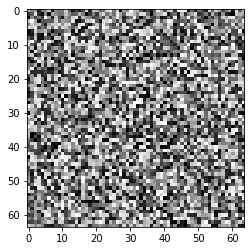

In [63]:
plt.imshow(image, cmap='gray')

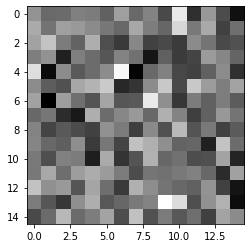

In [69]:
plt.imshow(pooling(convolution2d(image, filter_sobel), ksize=(4,4)), cmap='gray')

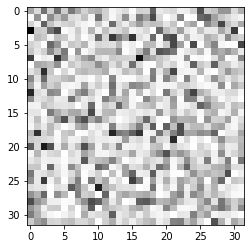

In [66]:
plt.imshow(pooling(image), cmap='gray')

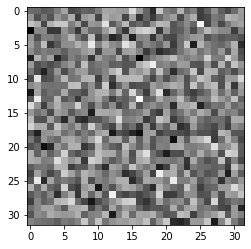

In [67]:
plt.imshow(pooling(image, method='mean'), cmap='gray')

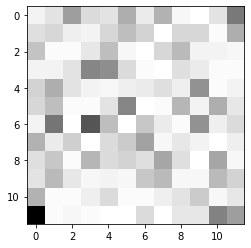

In [68]:
plt.imshow(pooling(image, ksize=(5, 5)), cmap='gray')

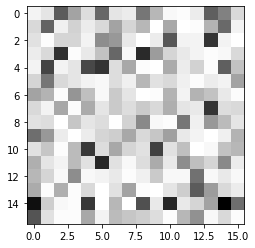

In [70]:
plt.imshow(pooling(image, ksize=(4, 4)), cmap='gray')